# Problem Statement
<b>•DOMAIN: </b>Botanical research

<b>•CONTEXT:</b> University  X  is  currently  undergoing  some  research  involving  understanding  the  characteristics  of plant  and  plant  seedlings  at  various  stages  of  growth.  They  already  have  have  invested  on  curating  sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo

<b>•DATA DESCRIPTION: </b>The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data

<b>•PROJECT  OBJECTIVE:</b> University’s  management  require  an  automation  which  can  create  a  classifier  capable  of determining a plant's species from a photo


In [1]:
# importing packges
import tensorflow as tf
import numpy as np
import cv2 ,os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing packages from tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,BatchNormalization,MaxPool2D,AvgPool2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam,SGD

In [3]:
# setting up traing and Test folder path
working_on_colab = False

if(working_on_colab):
    from google.colab import drive
    drive.mount('/content/drive')

    TRAIN_PATH = '/content/drive/MyDrive/Part-1 - Plant Seedling Classification Data/train/'
    PREDICT_PATH = '/content/drive/MyDrive/Part-1 - Plant Seedling Classification Data/Seedling - Prediction/'
    FOLDER_PATH = '/content/drive/MyDrive/Part-1 - Plant Seedling Classification Data/'
else:
    FOLDER_PATH = 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/'
    TRAIN_PATH = 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/train/'
    PREDICT_PATH = 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/Seedling - Prediction'

(196, 196, 3)


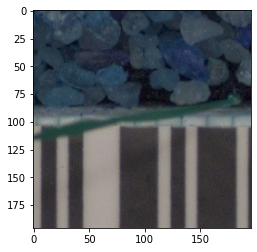

In [4]:
img = cv2.imread(TRAIN_PATH+'Black-grass/0050f38b3.png')
print(img.shape)
plt.imshow(img)

In [5]:
for dirpath, dirnames, filenames in os.walk(FOLDER_PATH): 
    print(f"There are < {len(dirnames)} > directories and \n < {len(filenames)} > images in '{dirpath}'.")

There are < 2 > directories and 
 < 0 > images in 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/'.
There are < 0 > directories and 
 < 1 > images in 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/Seedling - Prediction'.
There are < 12 > directories and 
 < 0 > images in 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/train'.
There are < 0 > directories and 
 < 263 > images in 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/train\Black-grass'.
There are < 0 > directories and 
 < 390 > images in 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/train\Charlock'.
There are < 0 > directories and 
 < 287 > images in 'D:/Datasets/Part-1 - Plant Seedling Classification Data/Part-1 - Plant Seedling Classification Data/train\Cleavers'

In [7]:

'''
# dependencies
# OS modules
import os
# Pandas
import pandas as pd
# In-built time module
import time
# tqdm for progress bars
from tqdm import tqdm
# Pillow Image Library
from PIL import Image
# Numpy module
import numpy as np

# A list for column names of csv
columnNames = list()

# iterate and build headers
for i in range(224*224*3):
    pixel = str(i)
    columnNames.append(pixel)

columnNames.append('label')
print("columnsNames  len = ",len(columnNames))
# Create a Pandas dataframe for storing data
train_data_2 = pd.DataFrame(columns = columnNames)# [str(i) for i in range(196*196*3)])

# calculates the total number of images in the dataset initially 0
num_images = 0

# iterate through every folder of the dataset
for i in class_names:

    # print messeage
    print("Iterating: " + str(i) + " folder")

    # itreate through every image in the folder
    # tqdm shows progress bar
    for j,file in enumerate(os.listdir(TRAIN_PATH+str(i))):
        # open image using PIL Image module
        if(j%100) == 0 :
            
            print(j," of ",len(os.listdir(os.path.join(TRAIN_PATH, str(i)))))
        img = cv2.imread(os.path.join(TRAIN_PATH,str(i), file))
        plt.imshow(img)
        # resize to 224x224, replace with your size
        #img = img.resize((192, 192), Image.NEAREST)
        img = cv2.resize(img, (224,224))
        ##print('img  shape = ',img.shape)
        # temporary array to store pixel values
        data = img.flatten()
        data = np.append(data,class_names.index(i))
        #data.append(img.flatten())
        ##print("len_data= ",len(data))
        # add the data row to training data dataframe
        train_data_2.loc[num_images] = data #np.insert(img.flatten(),class_names.index(i),0) #img.flatten()
    
        # increment the number of images
        num_images += 1
    #print(train_data_2.iloc[num_images-1,:])

# write the dataframe to the CSV file
train_data_2.to_csv("train_converted.csv", index=False)
'''

'\n# dependencies\n# OS modules\nimport os\n# Pandas\nimport pandas as pd\n# In-built time module\nimport time\n# tqdm for progress bars\nfrom tqdm import tqdm\n# Pillow Image Library\nfrom PIL import Image\n# Numpy module\nimport numpy as np\n\n# A list for column names of csv\ncolumnNames = list()\n\n# iterate and build headers\nfor i in range(224*224*3):\n    pixel = str(i)\n    columnNames.append(pixel)\n\ncolumnNames.append(\'label\')\nprint("columnsNames  len = ",len(columnNames))\n# Create a Pandas dataframe for storing data\ntrain_data_2 = pd.DataFrame(columns = columnNames)# [str(i) for i in range(196*196*3)])\n\n# calculates the total number of images in the dataset initially 0\nnum_images = 0\n\n# iterate through every folder of the dataset\nfor i in class_names:\n\n    # print messeage\n    print("Iterating: " + str(i) + " folder")\n\n    # itreate through every image in the folder\n    # tqdm shows progress bar\n    for j,file in enumerate(os.listdir(TRAIN_PATH+str(i))):\n

In [28]:
import dask.dataframe as dd
ML_data = pd.DataFrame()
#pd.read_csv('train_converted.csv',low_memory=False)#chunksize=100)

In [36]:
i =1
for chunck in pd.read_csv('train_converted.csv',chunksize=1000):
    print(i)
    i = i+1
    ML_data = pd.concat([ML_data,chunck],axis=0,ignore_index=True)

1
2
3
4
5


In [37]:
ML_data.head()

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,label
0,27,50,80,19,43,73,30,52,79,41,...,89,83,83,70,64,67,60,54,58,0
1,39,45,55,40,46,56,48,53,64,46,...,58,77,96,58,76,95,54,72,92,0
2,16,27,44,24,32,44,29,38,52,23,...,110,108,111,109,109,109,108,108,111,0
3,51,84,108,52,85,109,55,88,111,55,...,65,78,93,70,81,96,72,83,98,0
4,167,163,164,163,161,161,165,164,161,163,...,28,39,55,27,40,55,29,45,60,0


In [50]:
# taking 1000 examples of each one because of mermory issue
sample_df = ML_data.groupby('label').sample(100,random_state  = 1)

In [51]:
sample_df['label'].value_counts()

0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
Name: label, dtype: int64

In [52]:
sample_df.head()

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,label
95,119,120,121,122,123,128,122,122,128,125,...,98,98,100,119,119,121,139,141,141,0
12,46,46,50,48,45,53,44,47,51,49,...,199,200,195,180,182,182,178,179,176,0
164,82,90,98,83,91,99,86,94,102,90,...,36,43,63,37,44,64,37,44,64,0
176,144,146,148,145,146,149,144,146,148,144,...,111,126,138,104,122,131,96,111,125,0
51,23,31,67,8,31,61,32,51,73,36,...,162,159,153,176,170,162,153,149,146,0


In [53]:
# implementing SVM classifier using default  parameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_scaled_data = None
X_scaled_data = MinMaxScaler().fit_transform(sample_df.iloc[:,:-1])
y = sample_df.iloc[:,-1]
X_train,X_test,y_train,y_test = None ,None ,None ,None
X_train,X_test,y_train,y_test=train_test_split(X_scaled_data,y,test_size=0.20,random_state=77,stratify=y,shuffle = True)

svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(f'training accuracy is {svm.score(X_train,y_train)}')

The model is 38.75% accurate


In [54]:
print(f'training accuracy is {svm.score(X_train,y_train)}')

training accuracy is 0.8947916666666667


In [56]:
# for memroy error issue
ML_data = None 
X_scaled_data,sample_df = None,None
X_train,X_test,y_train,y_test = None ,None ,None ,None

In [6]:
# setting up traing data and preprocessing , here we are doing simple generator
train_gen = ImageDataGenerator(rescale=1./255,
                               validation_split=0.2)
val_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1./255)

In [7]:
# creating traing and validation dataset

train_data = train_gen.flow_from_directory(directory = TRAIN_PATH,
                                           target_size = (224,224), # adjusting rtarget size for better
                                           batch_size = 32,
                                           shuffle=True,
                                           class_mode = 'categorical',
                                           subset='training'
                                           )

validation_data = val_gen.flow_from_directory(directory = TRAIN_PATH,
                                           target_size =  (224,224),
                                           batch_size = 32,
                                           shuffle=True,
                                           class_mode = 'categorical',
                                           subset='validation'
                                           )

test_data = val_gen.flow_from_directory(directory = PREDICT_PATH,
                                           target_size =  (224,224),
                                           #classes=['test'],
                                           batch_size = 32,
                                           shuffle=True,
                                           class_mode = 'categorical',
                                           )

Found 3816 images belonging to 12 classes.
Found 951 images belonging to 12 classes.
Found 0 images belonging to 0 classes.


In [8]:
# getting the classes names from training data
class_names = train_data.class_indices
class_names = list(class_names)
class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [9]:
# getting how many images are present for each class
for category in class_names:
    print('{} ---->  {} images'.format(category, len(os.listdir(os.path.join(TRAIN_PATH, category)))))

Black-grass ---->  263 images
Charlock ---->  390 images
Cleavers ---->  287 images
Common Chickweed ---->  611 images
Common wheat ---->  221 images
Fat Hen ---->  475 images
Loose Silky-bent ---->  671 images
Maize ---->  221 images
Scentless Mayweed ---->  516 images
Shepherds Purse ---->  231 images
Small-flowered Cranesbill ---->  496 images
Sugar beet ---->  385 images


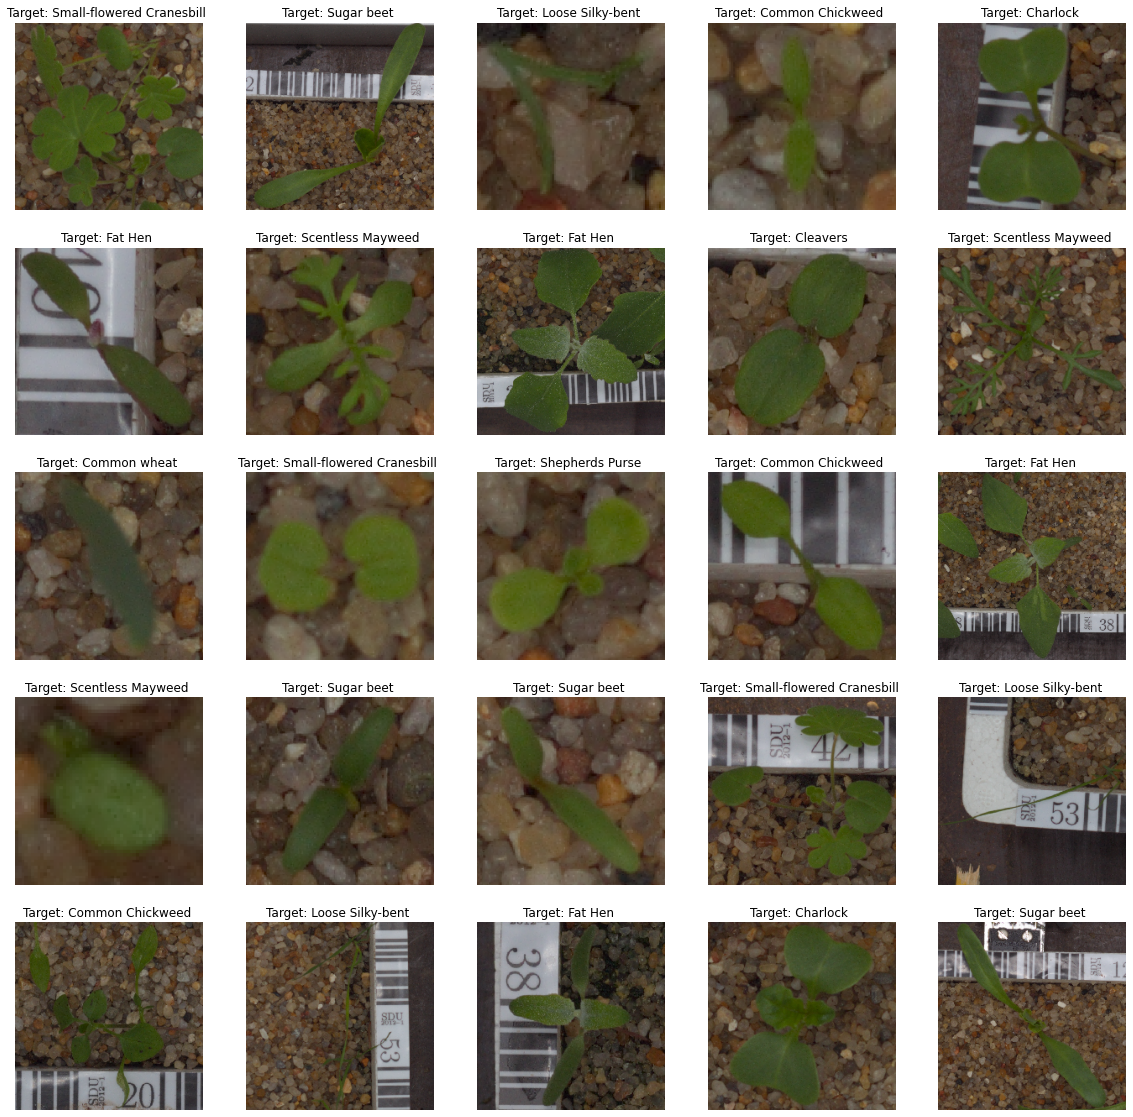

In [10]:
plt.figure(figsize = (20,20)) 
image, label = next(iter(train_data))
for i in range(0,25) : 
    
    ax = plt.subplot(5,5,i+1) 
    plt.imshow(image[i])
    plt.title(f"Target: {class_names[np.argmax(label[i])]} ")
    ax.axis("off")

In [11]:
# ANN 
model_1 = Sequential([
                      Flatten(),
                      Dense(264,activation = 'relu',),
                      Dense(256,activation = 'relu'),
                      Dense(128,activation = 'relu'),
                      Dense(64,activation = 'relu'),
                      Dense(12,activation = 'softmax'),
])

model_1.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                       metrics = ['accuracy'])

history = model_1.fit(train_data,epochs =20,validation_data = validation_data,batch_size=32)

Epoch 1/20
120/120 [==============================] - 185s 2s/step - loss: 4.7074 - accuracy: 0.1035 - val_loss: 2.5090 - val_accuracy: 0.0715
Epoch 2/20
120/120 [==============================] - 38s 312ms/step - loss: 2.4113 - accuracy: 0.1876 - val_loss: 2.1901 - val_accuracy: 0.2587
Epoch 3/20
120/120 [==============================] - 38s 311ms/step - loss: 2.2106 - accuracy: 0.2293 - val_loss: 2.0979 - val_accuracy: 0.2702
Epoch 4/20
120/120 [==============================] - 37s 311ms/step - loss: 2.0968 - accuracy: 0.2786 - val_loss: 2.0507 - val_accuracy: 0.3091
Epoch 5/20
120/120 [==============================] - 37s 310ms/step - loss: 1.9534 - accuracy: 0.3113 - val_loss: 1.8306 - val_accuracy: 0.3775
Epoch 6/20
120/120 [==============================] - 37s 309ms/step - loss: 1.9203 - accuracy: 0.3218 - val_loss: 1.9019 - val_accuracy: 0.2766
Epoch 7/20
120/120 [==============================] - 37s 309ms/step - loss: 1.8395 - accuracy: 0.3422 - val_loss: 1.7789 - val_accu

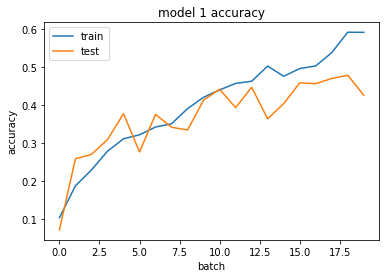

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# CNN models

In [14]:
# implementing Cnn with Padding
model_2 = Sequential([
                    Conv2D(filters = 8 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 16 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 32 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 64 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 128 , kernel_size=(3,3),activation='relu'),
                    AvgPool2D(pool_size=(2, 2) ,padding = 'same'),
                     Flatten(),
                    Dense(12,activation = 'softmax')                 

])

In [15]:
# using Adam optimizer
model_2.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                       metrics = ['accuracy'])

In [16]:
history = model_2.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 40s 323ms/step - loss: 2.2607 - accuracy: 0.2214 - val_loss: 1.7268 - val_accuracy: 0.4017
Epoch 2/20
120/120 [==============================] - 38s 315ms/step - loss: 1.6025 - accuracy: 0.4298 - val_loss: 1.5130 - val_accuracy: 0.4458
Epoch 3/20
120/120 [==============================] - 38s 311ms/step - loss: 1.3936 - accuracy: 0.5079 - val_loss: 1.2950 - val_accuracy: 0.5720
Epoch 4/20
120/120 [==============================] - 38s 312ms/step - loss: 1.1529 - accuracy: 0.5904 - val_loss: 1.1688 - val_accuracy: 0.5931
Epoch 5/20
120/120 [==============================] - 38s 313ms/step - loss: 0.9164 - accuracy: 0.6882 - val_loss: 0.9154 - val_accuracy: 0.7014
Epoch 6/20
120/120 [==============================] - 38s 313ms/step - loss: 0.7823 - accuracy: 0.7398 - val_loss: 0.8448 - val_accuracy: 0.7424
Epoch 7/20
120/120 [==============================] - 38s 313ms/step - loss: 0.6932 - accuracy: 0.7615 - val_loss: 0.8225 - val_ac

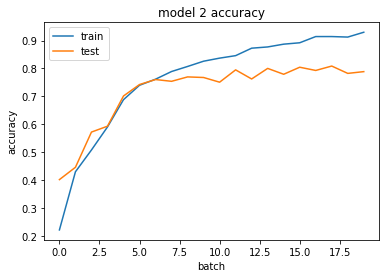

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# using SGD optimizer
model_2.compile(loss = 'categorical_crossentropy',
                      optimizer = 'sgd',
                       metrics = ['accuracy'])

In [19]:
history = model_2.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 39s 318ms/step - loss: nan - accuracy: 0.0681 - val_loss: nan - val_accuracy: 0.0547
Epoch 2/20
120/120 [==============================] - 38s 312ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0547
Epoch 3/20
120/120 [==============================] - 38s 311ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0547
Epoch 4/20
120/120 [==============================] - 38s 314ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0547
Epoch 5/20
120/120 [==============================] - 38s 313ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0547
Epoch 6/20
120/120 [==============================] - 38s 314ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0547
Epoch 7/20
120/120 [==============================] - 38s 312ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0547
Epoch 8/20
120/120 [=======

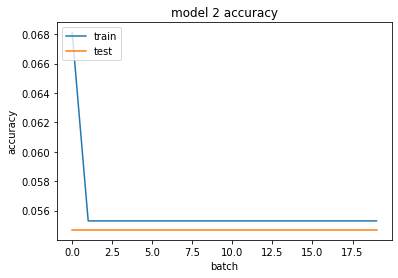

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# cnn with 2 Dense layer
model_3 = Sequential([
                    Conv2D(filters = 8 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 16 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 32 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 64 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Conv2D(filters = 128 , kernel_size=(3,3),activation='relu'),
                    AvgPool2D(pool_size=(2, 2) ,padding = 'same'),
                    Flatten(),
                    Dense(100,activation='relu'),
                    BatchNormalization(),
                    Dense(12,activation = 'softmax')                 

])

In [22]:
# adam optimizer
model_3.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                       metrics = ['accuracy'])

In [23]:
history = model_3.fit(train_data,epochs =20,validation_data = validation_data)


Epoch 1/20
120/120 [==============================] - 39s 317ms/step - loss: 1.9038 - accuracy: 0.3548 - val_loss: 2.2805 - val_accuracy: 0.2671
Epoch 2/20
120/120 [==============================] - 38s 312ms/step - loss: 1.1289 - accuracy: 0.6394 - val_loss: 1.5396 - val_accuracy: 0.5373
Epoch 3/20
120/120 [==============================] - 38s 311ms/step - loss: 0.8282 - accuracy: 0.7448 - val_loss: 0.9861 - val_accuracy: 0.6961
Epoch 4/20
120/120 [==============================] - 38s 308ms/step - loss: 0.6225 - accuracy: 0.8063 - val_loss: 1.7406 - val_accuracy: 0.4942
Epoch 5/20
120/120 [==============================] - 38s 312ms/step - loss: 0.5136 - accuracy: 0.8331 - val_loss: 0.7856 - val_accuracy: 0.7382
Epoch 6/20
120/120 [==============================] - 38s 317ms/step - loss: 0.4140 - accuracy: 0.8692 - val_loss: 1.2035 - val_accuracy: 0.6383
Epoch 7/20
120/120 [==============================] - 38s 312ms/step - loss: 0.3550 - accuracy: 0.8834 - val_loss: 0.7242 - val_ac

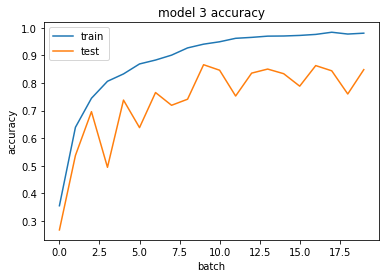

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model_3.compile(loss = 'categorical_crossentropy',
                      optimizer = 'sgd',
                       metrics = ['accuracy'])

In [26]:
history = model_3.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 38s 315ms/step - loss: 2.4995 - accuracy: 0.3700 - val_loss: 46.7566 - val_accuracy: 0.0463
Epoch 2/20
120/120 [==============================] - 38s 313ms/step - loss: 1.5322 - accuracy: 0.4851 - val_loss: 5.2629 - val_accuracy: 0.2156
Epoch 3/20
120/120 [==============================] - 38s 312ms/step - loss: 1.0701 - accuracy: 0.6381 - val_loss: 7.2869 - val_accuracy: 0.1272
Epoch 4/20
120/120 [==============================] - 38s 314ms/step - loss: 0.8411 - accuracy: 0.7175 - val_loss: 1.1604 - val_accuracy: 0.6572
Epoch 5/20
120/120 [==============================] - 38s 312ms/step - loss: 0.6859 - accuracy: 0.7681 - val_loss: 1.1085 - val_accuracy: 0.6341
Epoch 6/20
120/120 [==============================] - 38s 312ms/step - loss: 0.5657 - accuracy: 0.8042 - val_loss: 1.2605 - val_accuracy: 0.6130
Epoch 7/20
120/120 [==============================] - 38s 312ms/step - loss: 0.4926 - accuracy: 0.8265 - val_loss: 0.7598 - val_a

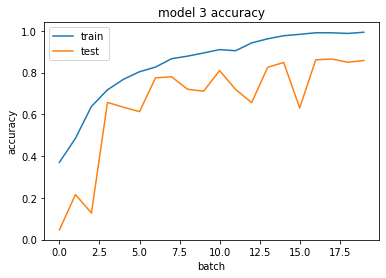

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# cnn without paddding
model_4 = Sequential([
                    Conv2D(filters = 8 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 16 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 32 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 64 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 128 , kernel_size=(3,3),activation='relu'),
                    AvgPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Flatten(),
                    Dense(12,activation = 'softmax')                 

])

In [29]:
model_4.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                       metrics = ['accuracy'])

In [30]:
history = model_4.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 37s 305ms/step - loss: 2.2874 - accuracy: 0.1986 - val_loss: 1.8135 - val_accuracy: 0.3796
Epoch 2/20
120/120 [==============================] - 36s 302ms/step - loss: 1.6605 - accuracy: 0.4193 - val_loss: 1.5213 - val_accuracy: 0.5131
Epoch 3/20
120/120 [==============================] - 36s 301ms/step - loss: 1.2955 - accuracy: 0.5498 - val_loss: 1.1166 - val_accuracy: 0.6562
Epoch 4/20
120/120 [==============================] - 36s 300ms/step - loss: 1.0105 - accuracy: 0.6633 - val_loss: 0.9786 - val_accuracy: 0.6909
Epoch 5/20
120/120 [==============================] - 36s 301ms/step - loss: 0.7996 - accuracy: 0.7269 - val_loss: 0.9179 - val_accuracy: 0.7140
Epoch 6/20
120/120 [==============================] - 36s 301ms/step - loss: 0.7121 - accuracy: 0.7594 - val_loss: 0.8232 - val_accuracy: 0.7571
Epoch 7/20
120/120 [==============================] - 36s 303ms/step - loss: 0.6504 - accuracy: 0.7783 - val_loss: 0.8807 - val_ac

In [31]:
model_4.compile(loss = 'categorical_crossentropy',
                      optimizer = 'sgd',
                       metrics = ['accuracy'])

In [32]:
history = model_4.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 37s 302ms/step - loss: 4.0243 - accuracy: 0.1389 - val_loss: 2.4698 - val_accuracy: 0.1409
Epoch 2/20
120/120 [==============================] - 36s 300ms/step - loss: 2.4648 - accuracy: 0.1407 - val_loss: 2.4596 - val_accuracy: 0.1409
Epoch 3/20
120/120 [==============================] - 36s 304ms/step - loss: 2.4556 - accuracy: 0.1407 - val_loss: 2.4512 - val_accuracy: 0.1409
Epoch 4/20
120/120 [==============================] - 36s 300ms/step - loss: 2.4481 - accuracy: 0.1407 - val_loss: 2.4444 - val_accuracy: 0.1409
Epoch 5/20
120/120 [==============================] - 36s 301ms/step - loss: 2.4419 - accuracy: 0.1407 - val_loss: 2.4388 - val_accuracy: 0.1409
Epoch 6/20
120/120 [==============================] - 36s 302ms/step - loss: 2.4370 - accuracy: 0.1407 - val_loss: 2.4343 - val_accuracy: 0.1409
Epoch 7/20
120/120 [==============================] - 36s 302ms/step - loss: 2.4328 - accuracy: 0.1407 - val_loss: 2.4305 - val_ac

In [33]:
# with 2 dense layer
model_5 = Sequential([
                    Conv2D(filters = 8 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 16 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 32 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 64 , kernel_size=(3,3),activation='relu'),
                    MaxPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Conv2D(filters = 128 , kernel_size=(3,3),activation='relu'),
                    AvgPool2D(pool_size=(2, 2) ,padding = 'valid'),
                    Flatten(),
                    Dense(100,activation='relu'),
                    BatchNormalization(),
                    Dense(12,activation = 'softmax')                 

])

In [34]:
model_5.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                       metrics = ['accuracy'])

In [35]:
history = model_5.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 37s 307ms/step - loss: 1.6088 - accuracy: 0.4615 - val_loss: 1.8546 - val_accuracy: 0.4616
Epoch 2/20
120/120 [==============================] - 36s 301ms/step - loss: 1.0418 - accuracy: 0.6706 - val_loss: 1.2605 - val_accuracy: 0.6540
Epoch 3/20
120/120 [==============================] - 36s 301ms/step - loss: 0.8379 - accuracy: 0.7251 - val_loss: 1.0984 - val_accuracy: 0.6435
Epoch 4/20
120/120 [==============================] - 36s 301ms/step - loss: 0.6981 - accuracy: 0.7689 - val_loss: 1.1010 - val_accuracy: 0.6730
Epoch 5/20
120/120 [==============================] - 36s 301ms/step - loss: 0.5661 - accuracy: 0.8150 - val_loss: 0.6438 - val_accuracy: 0.7992
Epoch 6/20
120/120 [==============================] - 36s 302ms/step - loss: 0.4728 - accuracy: 0.8422 - val_loss: 1.0521 - val_accuracy: 0.6740
Epoch 7/20
120/120 [==============================] - 36s 301ms/step - loss: 0.3919 - accuracy: 0.8664 - val_loss: 0.5304 - val_ac

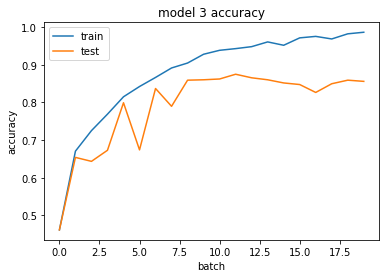

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
model_5.compile(loss = 'categorical_crossentropy',
                      optimizer = 'sgd',
                       metrics = ['accuracy'])

In [38]:
history = model_5.fit(train_data,epochs =20,validation_data = validation_data)

Epoch 1/20
120/120 [==============================] - 37s 305ms/step - loss: 2.1795 - accuracy: 0.2883 - val_loss: 4.9990 - val_accuracy: 0.1525
Epoch 2/20
120/120 [==============================] - 37s 303ms/step - loss: 1.4553 - accuracy: 0.4990 - val_loss: 10.3461 - val_accuracy: 0.1283
Epoch 3/20
120/120 [==============================] - 36s 301ms/step - loss: 1.2572 - accuracy: 0.5671 - val_loss: 5.8200 - val_accuracy: 0.2261
Epoch 4/20
120/120 [==============================] - 36s 302ms/step - loss: 1.1386 - accuracy: 0.6082 - val_loss: 7.9160 - val_accuracy: 0.1009
Epoch 5/20
120/120 [==============================] - 36s 301ms/step - loss: 1.0354 - accuracy: 0.6473 - val_loss: 2.3068 - val_accuracy: 0.3523
Epoch 6/20
120/120 [==============================] - 36s 302ms/step - loss: 0.9529 - accuracy: 0.6785 - val_loss: 6.0419 - val_accuracy: 0.1335
Epoch 7/20
120/120 [==============================] - 36s 303ms/step - loss: 0.9029 - accuracy: 0.6926 - val_loss: 1.4171 - val_a

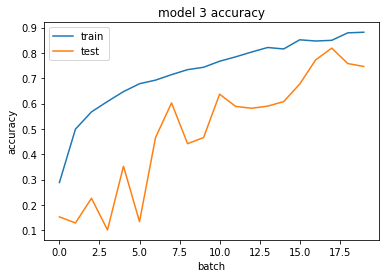

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# transfer learning 

import tensorflow_hub as hub

resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

def create_model(model_url,num_classes = 10):
    """
    takes tensorhub url and reate tensorflow models from it
    """
    feature_extractor_layer = hub.KerasLayer(model_url, trainable = False,name = 'feature_ext_layer',input_shape = IMAGE_SHAPE+(3,))
    
    model = tf.keras.models.Sequential([
    feature_extractor_layer,
    Dense(num_classes,activation = 'softmax',name = 'output_layer')
    ])
    
    return model

#create renet model
resnet_model_1 = create_model(resnet_url,train_data.num_classes)

In [41]:
resnet_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_ext_layer (KerasLay  (None, 2048)             23564800  
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 12)                24588     
                                                                 
Total params: 23,589,388
Trainable params: 24,588
Non-trainable params: 23,564,800
_________________________________________________________________


In [42]:
resnet_model_1.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                       metrics = ['accuracy'])

In [43]:
#lets fit model to our data
resnet_history = resnet_model_1.fit(train_data,
                                   epochs = 20,
                                   #steps_per_epoch = len(train_data),
                                   validation_data = validation_data,
                                   #validation_steps = len(test_data)
                                    )

Epoch 1/20
120/120 [==============================] - 44s 328ms/step - loss: 1.3256 - accuracy: 0.5784 - val_loss: 0.8966 - val_accuracy: 0.7234
Epoch 2/20
120/120 [==============================] - 37s 308ms/step - loss: 0.6704 - accuracy: 0.8153 - val_loss: 0.6817 - val_accuracy: 0.7971
Epoch 3/20
120/120 [==============================] - 37s 306ms/step - loss: 0.4981 - accuracy: 0.8619 - val_loss: 0.6110 - val_accuracy: 0.8149
Epoch 4/20
120/120 [==============================] - 37s 308ms/step - loss: 0.4026 - accuracy: 0.8894 - val_loss: 0.5568 - val_accuracy: 0.8339
Epoch 5/20
120/120 [==============================] - 37s 307ms/step - loss: 0.3426 - accuracy: 0.9109 - val_loss: 0.5247 - val_accuracy: 0.8507
Epoch 6/20
120/120 [==============================] - 37s 307ms/step - loss: 0.2963 - accuracy: 0.9243 - val_loss: 0.5098 - val_accuracy: 0.8507
Epoch 7/20
120/120 [==============================] - 37s 308ms/step - loss: 0.2609 - accuracy: 0.9347 - val_loss: 0.4932 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


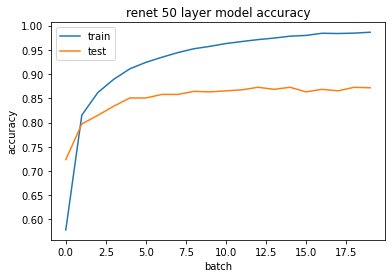

In [44]:
print(resnet_history.history.keys())
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('renet 50 layer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

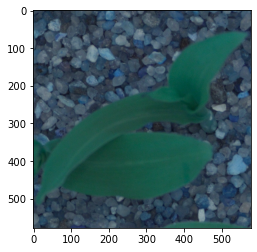

In [45]:
#Predicting the image
pred_img = cv2.imread(PREDICT_PATH+'/Predict.png')/255
plt.imshow(pred_img)
pred_img = cv2.resize(pred_img,(224,224))
pred_img = np.expand_dims(pred_img, axis=0) 
prediction = resnet_model_1.predict(pred_img)

In [46]:
class_names[np.where(np.array(prediction>0.8).flatten() == True)[0][0]]

'Maize'

In [48]:
# saving model for future use
resnet_model_1.save('cnn_resent_model_1')

INFO:tensorflow:Assets written to: cnn_resent_model_1\assets


INFO:tensorflow:Assets written to: cnn_resent_model_1\assets


# Conclusions
* resnet with 50 layers is doing Good job in predicting [TRANSFER Learning ] 
* Here I took image size to be (224,224 ) (majority of people took this for image classification problem)
* Implement Basic Ann which not performing very good  on this classification
* Implemented CNN with and without padding 
* Implemented Transfer Learning 
* Batch in plot is epochs
* Tried SVM machine learning by creating dataframe of images with shape (1,224*224*3)
* used SVC with default parameters and did not use other models may be they perform better
* saved the resent model 